In [81]:
import pandas as pd
import numpy as np
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from io import StringIO

In [82]:
df_sncf = pd.read_csv(filepath_or_buffer='data/emission-co2-tgv.csv',sep=';')

In [83]:
df_sncf

,Type de trajet,Origine,Origine_uic,Destination,Destination_uic,Liaison,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur),TGV (3 pers.) - Empreinte CO2e (kgCO2e/voyageur),Voiture (autosolisme 1 pers.) - Empreinte CO2e (kgCO2e/voyageur),Voiture (covoiturage 3 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,Province/Province,Bordeaux Saint-Jean,87581009,Champagne-Ardenne TGV,87171926,Bordeaux Saint-Jean - Champagne-Ardenne TGV,700.061,1.897165,5.691496,135.111773,45.037258
1,Province/Province,Bordeaux Saint-Jean,87581009,Lorraine TGV,87142109,Bordeaux Saint-Jean - Lorraine TGV,867.618,2.351245,7.053734,167.450274,55.816758
2,Province/Province,Nantes,87481002,Brest,87474007,Nantes - Brest,593.333,1.607932,4.823797,76.912623,25.637541
3,Province/Province,Nantes,87481002,Toulouse Matabiau,87611004,Nantes - Toulouse Matabiau,782.081,2.119440,6.358319,150.941633,50.313878
4,Paris/Province,Paris Gare de Lyon,87686006,Avignon TGV,87318964,Paris Gare de Lyon - Avignon TGV,661.020,1.791364,5.374093,127.576860,42.525620
...,...,...,...,...,...,...,...,...,...,...,...
106,Paris/Province,Paris Gare de Lyon,87686006,Nice,87756056,Paris Gare de Lyon - Nice,971.680,2.633253,7.899758,187.534240,62.511413
107,Paris/Province,Paris Montparnasse,87391003,Saint-Malo,87478107,Paris Montparnasse - Saint-Malo,444.830,1.205489,3.616468,85.852190,28.617397
108,Paris/Province,Paris Gare de Lyon,87686006,Valence TGV Rhône-Alpes Sud,87763029,Paris Gare de Lyon - Valence TGV Rhône-Alpes Sud,527.124,1.428506,4.285518,101.734932,33.911644
109,Province/Province,Strasbourg,87212027,Marne-la-Vallée Chessy,87111849,Strasbourg - Marne-la-Vallée Chessy,428.817,1.162094,3.486282,82.761681,27.587227


In [84]:
df_sncf = df_sncf[['Distance (km)','TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)']]

In [85]:
df_sncf.corr() #En considérant la corrélation, ce jeu de données semble être idéal pour effectuer une régression linéaire.

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
Distance (km),1.0,1.0
TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur),1.0,1.0


In [86]:
df_sncf.head()

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,700.061,1.897165
1,867.618,2.351245
2,593.333,1.607932
3,782.081,2.119440
4,661.020,1.791364


In [87]:
df_sncf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Distance (km)                                     111 non-null    float64
 1   TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)  111 non-null    float64
dtypes: float64(2)
memory usage: 1.9 KB


In [88]:
# Shuffle the DataFrame
df_sncf_shuffled = shuffle(df_sncf, random_state=200)

# Split the shuffled DataFrame into train and test
train = df_sncf_shuffled.sample(frac=0.8, random_state=200) # type: ignore
test = df_sncf_shuffled[~df_sncf_shuffled.index.isin(train.index)]

# Reset the indices for both train and test DataFrames
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


In [89]:
train

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,314.090,0.851184
1,1105.927,2.997062
2,593.333,1.607932
3,283.752,0.768968
4,290.806,0.788084
...,...,...
84,609.253,1.651076
85,595.333,1.613352
86,525.960,1.425352
87,867.618,2.351245


In [90]:
test

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,496.010,1.344187
1,584.182,1.583133
2,429.496,1.163934
3,537.130,1.455622
4,469.429,1.272153
5,560.633,1.519315
6,694.440,1.881932
7,489.554,1.326691
8,803.684,2.177984
9,201.678,0.546547


In [91]:
test = test.rename(columns={'TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)': 'kgCO2e/voyageur'})
train = train.rename(columns={'TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)': 'kgCO2e/voyageur'})

In [92]:
train

,Distance (km),kgCO2e/voyageur
0,314.090,0.851184
1,1105.927,2.997062
2,593.333,1.607932
3,283.752,0.768968
4,290.806,0.788084
...,...,...
84,609.253,1.651076
85,595.333,1.613352
86,525.960,1.425352
87,867.618,2.351245


In [93]:
name_feature = 'Distance (km)' #Variable explicative, indépendante
name_target = 'kgCO2e/voyageur'#Variable expliqué, dépendante,à prédire
m = train.shape[0] #Nombre de lignes, pour les variables
n = df_sncf.columns.shape[0] - 1 #Nombres de features

In [94]:
def matrix_X(data,name_feature,m,n):
  X = np.array([data[name_feature]])
  ONES = np.ones_like(X)
  X = np.stack((X,ONES),axis=-1).reshape(m,(n+1))
  return X

In [95]:
def matrix_Y(data,name_target,m):
  Y = np.array([data[name_target]])
  Y = Y.reshape(m,1)
  return Y

In [96]:
def matrix_theta(n):
  np.random.seed(142)
  THETA = np.random.randn(n+1,1)
  return THETA

In [97]:
def matrix_F(X,THETA):
  F = X.dot(THETA)
  return F

In [98]:
def calculate_J(X,Y,F,m):
  J = 1/2 * m * np.sum((F - Y)**2)
  return J

In [99]:
def metrics(X,Y,F,m):
  mse = calculate_J(X,Y,F,m)
  rmse = math.sqrt(mse)
  dict_metrics = {'MSE':mse,'RMSE':rmse}
  df_metrics = pd.Series(dict_metrics)
  return df_metrics

In [100]:
def store_the_good_coefficients(THETA, rmse):
    # Charger le DataFrame depuis le fichier CSV s'il existe
    try:
        coefficients_df = pd.read_csv('/content/coefficient.csv')
    except FileNotFoundError:
        coefficients_df = pd.DataFrame(columns=['θ', 'rmse à l\'entrainement'])

    # Si le DataFrame est vide ou la nouvelle RMSE est inférieure, mettre à jour et sauvegarder
    if coefficients_df.empty or rmse < coefficients_df['rmse à l\'entrainement'].iloc[0]:
        coefficients_df = pd.DataFrame({'θ': [THETA], 'rmse à l\'entrainement': [rmse]})
        coefficients_df.to_csv(path_or_buf='data/coefficient.csv', index=False)

    return coefficients_df


In [101]:
def load_theta_selected(THETA_FOR_TEST,n):
    if type(THETA_FOR_TEST) == str:
        THETA_FOR_TEST = THETA_FOR_TEST.replace("[","").replace("]","")
        THETA_FOR_TEST = StringIO(THETA_FOR_TEST)
        THETA_FOR_TEST = np.loadtxt(THETA_FOR_TEST)
        THETA_FOR_TEST = THETA_FOR_TEST.reshape((n+1),1)
        return THETA_FOR_TEST
    else:
        return THETA_FOR_TEST

In [102]:
def calculate_gradient(X,Y,F,m):
  m = X.shape[0]
  dJ_dTHETA = 1/m * X.T.dot(F - Y)
  return dJ_dTHETA

In [103]:
def gradient_descent(data, alpha, epochs):
    m = data.shape[0]
    X = matrix_X(data=train, name_feature=name_feature, m=m,n=n)
    Y = matrix_Y(data=train, name_target=name_target, m=m)
    THETA = matrix_theta(n=n)

    for epoch in range(epochs):
        F = matrix_F(X=X, THETA=THETA)
        J = calculate_J(X=X, Y=Y, F=F, m=m)
        gradient = calculate_gradient(X=X, Y=Y, F=F, m=m)
        THETA -= alpha * gradient

    return THETA

In [104]:
def draw_linear_regression_models(data, F, name_feature, name_target):
    # Ajoutez la colonne 'Prediction' à votre DataFrame avec les prédictions du modèle
    data['Prediction'] = F

    # Trouvez les valeurs minimales et maximales pour bien calibrer l'axe y
    y_min = min(data[name_target].min(), data['Prediction'].min())
    y_max = max(data[name_target].max(), data['Prediction'].max())

    # Affichez le nuage de points des données réelles
    plt.scatter(data[name_feature], data[name_target], label="Données réelles")

    # Tracez la ligne du modèle avec les prédictions en rouge
    plt.plot(data[name_feature], data['Prediction'], color='red', label="Modèle")

    # Étiquetez les axes x et y
    plt.xlabel(name_feature)
    plt.ylabel(name_target)

    # Fixez les limites de l'axe y en fonction des valeurs minimales et maximales
    plt.ylim(y_min, y_max)

    # Ajoutez une légende pour identifier les données réelles et le modèle
    plt.legend()

    # Affichez le graphique
    plt.show()

In [105]:
THETA = gradient_descent(data=train, alpha=0.00000548, epochs=3400000)
X = matrix_X(data=train, name_feature=name_feature, m=m, n=n)
Y = matrix_Y(data=train, name_target=name_target, m=m)
F = matrix_F(X=X, THETA=THETA)

In [106]:
THETA

array([[0.00264125],
       [0.0453298 ]])

In [107]:
info_metrics = metrics(X=X,Y=Y,F=F,m=m)

In [108]:
info_metrics

MSE     1.306326
RMSE    1.142946
dtype: float64

In [109]:
coefficients = store_the_good_coefficients(THETA=THETA,rmse=info_metrics['RMSE'])

In [110]:
coefficients

,θ,rmse à l'entrainement
0,"[[0.002641245188899177], [0.04532980260257222]]",1.142946


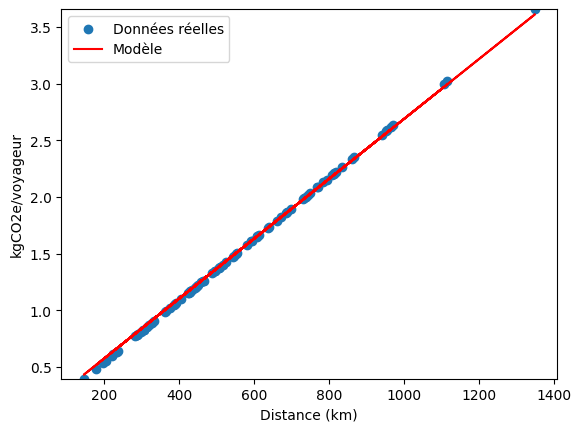

In [111]:
draw_linear_regression_models(train,F,name_feature,name_target)

In [112]:
F #Les prédictions sur les données de train.

array([[0.8749185 ],
       [2.96635417],
       [1.61246773],
       [0.79478841],
       [0.81341975],
       [0.67089816],
       [1.27544221],
       [2.14245999],
       [1.85369002],
       [1.38547648],
       [2.55902926],
       [1.2202349 ],
       [0.64026764],
       [1.27415064],
       [1.3362965 ],
       [1.35701706],
       [1.18204778],
       [1.38522292],
       [0.80334604],
       [1.01106677],
       [0.62830808],
       [2.0778657 ],
       [1.07359561],
       [2.01172628],
       [2.56698205],
       [1.58192702],
       [2.18054147],
       [0.91271472],
       [2.59676737],
       [1.50727486],
       [1.86528508],
       [2.52992538],
       [2.3245897 ],
       [1.38899198],
       [1.17631627],
       [0.58441851],
       [1.23542206],
       [2.61177493],
       [1.72751245],
       [1.82188678],
       [1.40926089],
       [2.20728407],
       [2.19112758],
       [1.99684286],
       [1.21326201],
       [1.23237406],
       [2.07909124],
       [1.177

Ici, on utilise les données de test, donc on n'entraîne plus le modèle ; on utilise simplement les coefficients calculés (notre nouvelle matrice THETA).

In [113]:
THETA = load_theta_selected(THETA_FOR_TEST=coefficients['θ'].iloc[0],n=n) #On récupère la matrice THETA qui a été stocké dans un fichier csv.

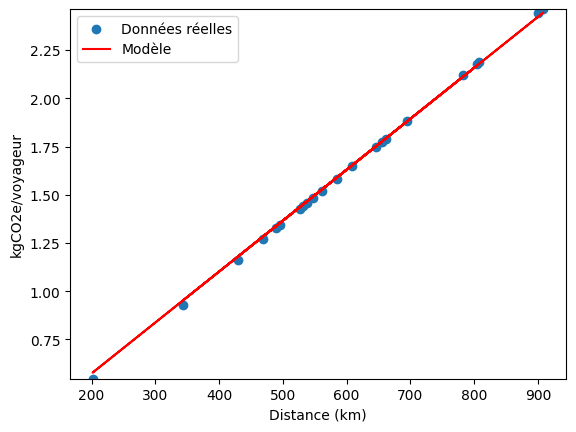

In [114]:
name_feature = 'Distance (km)' #Variable explicative, indépendante
name_target = 'kgCO2e/voyageur'#Variable expliqué, dépendante,à prédire
m = test.shape[0] #Nombre de lignes, pour les variables

X = matrix_X(data=test, name_feature=name_feature, m=m, n=n)
Y = matrix_Y(data=test, name_target=name_target, m=m)
F = matrix_F(X=X, THETA=THETA)
draw_linear_regression_models(test,F,name_feature,name_target)

In [115]:
info_metrics = metrics(X=X,Y=Y,F=F,m=m)

In [116]:
info_metrics # On observe une très faible rmse même au niveau du test, le modèle c'est bien généralisé.

MSE     0.037032
RMSE    0.192438
dtype: float64

In [117]:
F #Les prédictions sur les données de test.

array([[1.35541383],
       [1.5882977 ],
       [1.17973405],
       [1.46402183],
       [1.28520689],
       [1.52609902],
       [1.87951611],
       [1.33836195],
       [2.1680563 ],
       [0.57801085],
       [1.7912457 ],
       [2.42333265],
       [2.44529724],
       [2.11099748],
       [1.7748013 ],
       [0.95277713],
       [1.43759353],
       [1.65209962],
       [1.74987323],
       [1.48984793],
       [2.17727425],
       [1.45034282]])